In [167]:
import torch

In [168]:
words = open('names.txt','r').read().split('\n')

In [169]:
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [170]:
a = torch.tensor([1.0,2,3])

In [171]:
cl = set([i for j in words for i in j]) # total number of unique character length in our dataset

In [172]:
cl

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [736]:
stoi = {item: i for i, item in enumerate(['.'] + sorted(cl)) }

In [740]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [741]:
stoi = {item: i for i, item in enumerate(['.'] + sorted(cl)) }

itos = {i:item for i, item in enumerate(['.'] + sorted(cl)) }

In [742]:
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [177]:
m = torch.zeros(( len(cl)+1, len(cl)+1)) #making nxn matrix to save the count of each word that comes after another word

In [178]:
import matplotlib.pyplot as plt


In [179]:
for item in words: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2 in zip(item, item[1:]):
        f,s = stoi[c1], stoi[c2]
        m[f,s] += 1
        

m[0,2]

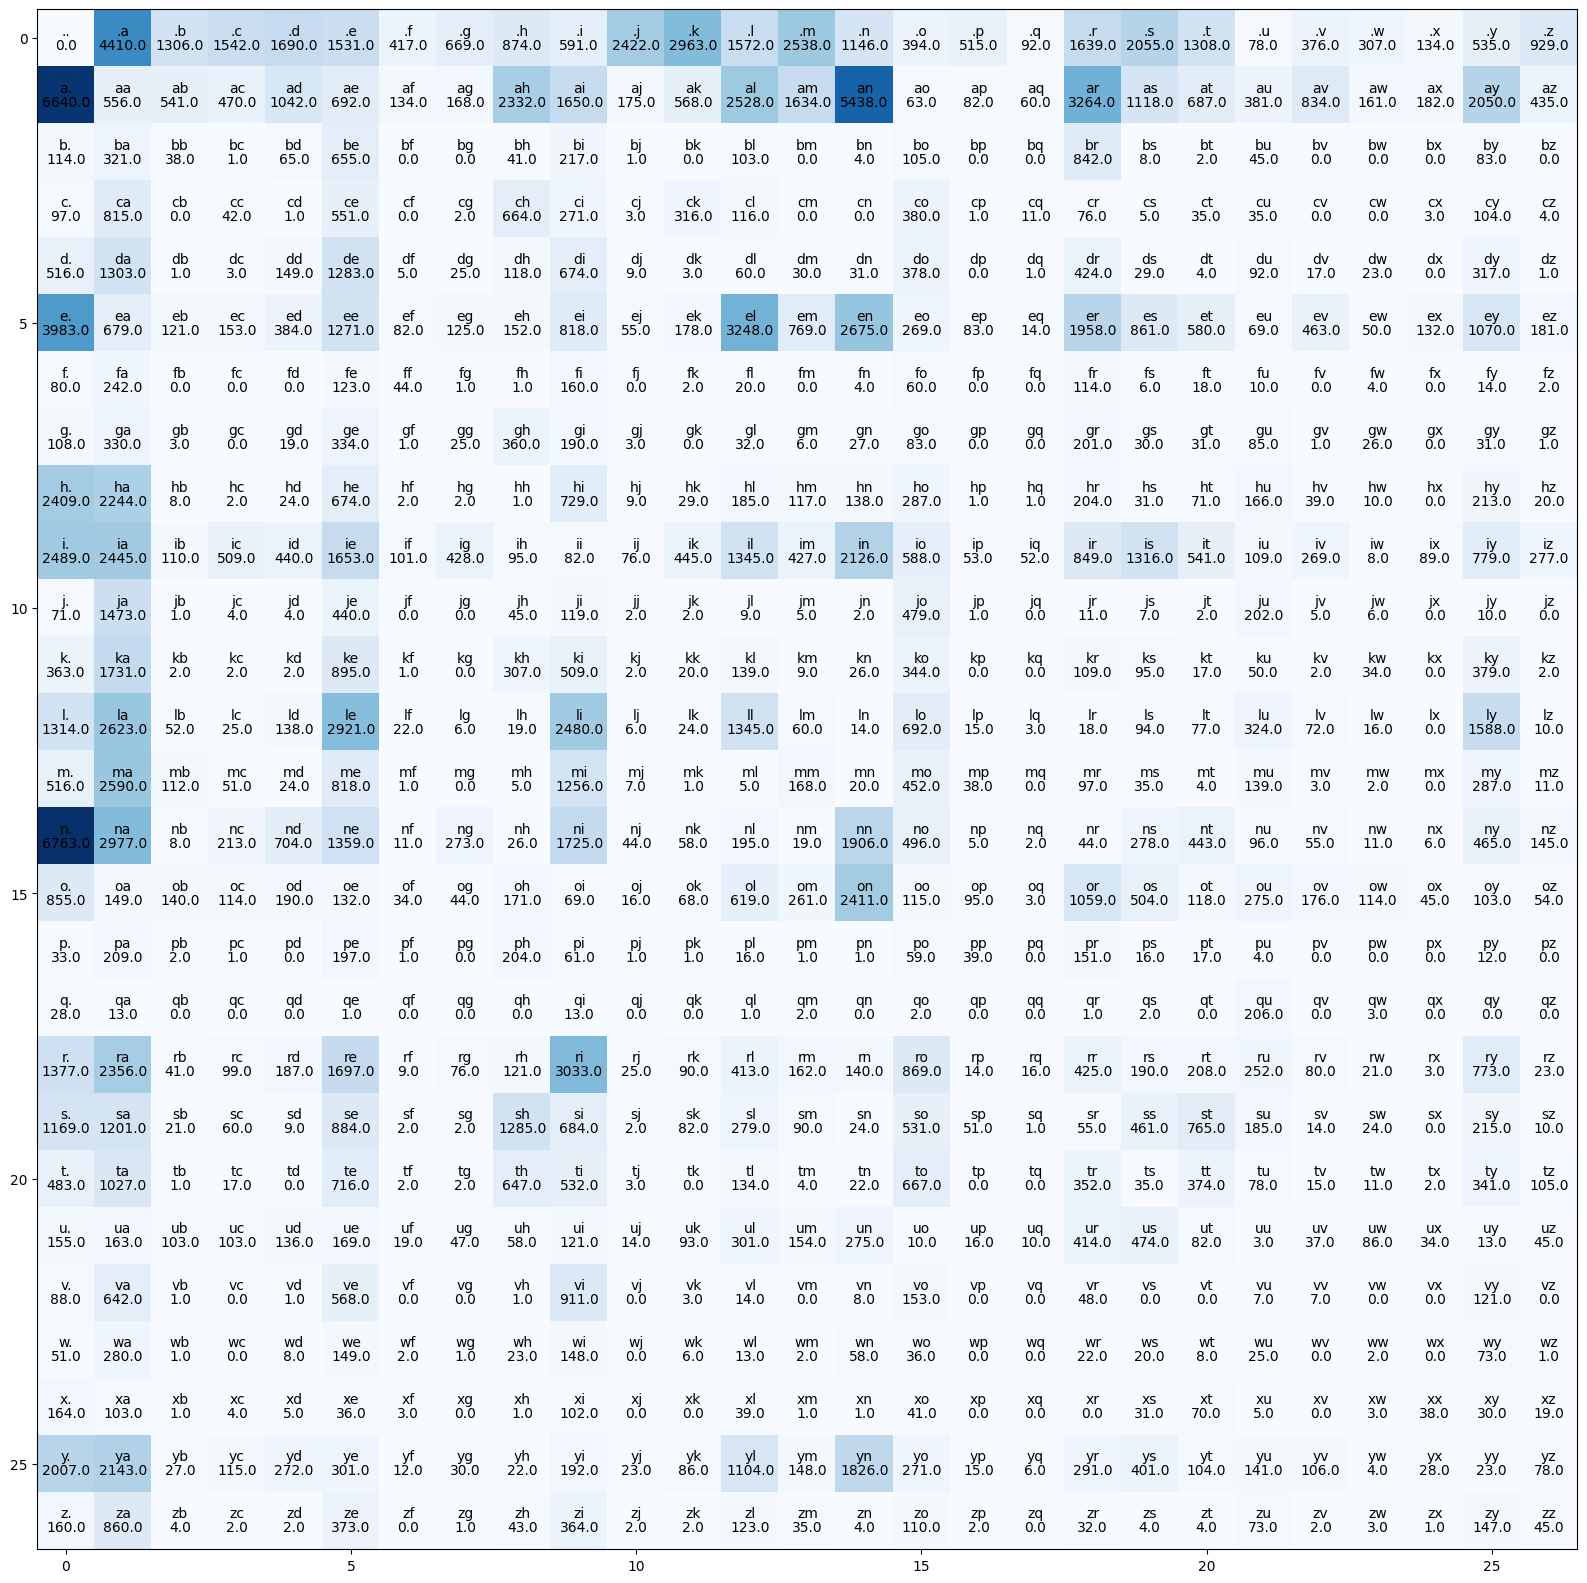

In [180]:
plt.figure(figsize=(20,20))
plt.imshow(m, cmap='Blues')

r,c = m.shape

for i in range(r):
    for j in range(c):
        plt.text(j,i, f'{itos[i] + itos[j]}',ha='center', va='bottom' )
        plt.text(j,i, f'{m[i,j].item()}',  ha="center", va="top")

lets assume those counts/frequenies are the weights of our DL model, we can do that by converting them into a probability i.e by normalizing them 

#### Make sure you understanding broadcasting rules in pytorch

General semantics

Two tensors are “broadcastable” if the following rules hold:

Each tensor has at least one dimension.
When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.
[see broadcasting docs](https://pytorch.org/docs/stable/notes/broadcasting.html)

In [181]:
# all same size, so possible
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)

# Can't broad case, cause x has size 0
x=torch.empty((0,))
y=torch.empty(2,2)

# possible, reason: 1st trailing size matches, 2nd trailing size y has 1, 3rd trailing has same dimension, in 4th trailing y size does not exists. 
x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)

x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)

**normalize all the rows**

In [182]:
m.shape

torch.Size([27, 27])

In [183]:
m_sum = m.sum(dim=1, keepdim = True)

In [184]:
m_sum.shape

torch.Size([27, 1])

now m is turned into probability

In [185]:
m = m/ m_sum

verify that we always divide all the rows by sum of its elements

In [188]:
m[0].sum()

tensor(1.)

In [197]:
m[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [193]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(m[0], num_samples=1, replacement=True, generator=g).item()

In [194]:
ix

3

In [196]:
itos[ix]

'c'

In [242]:
g = torch.Generator().manual_seed(2147483647)

In [243]:
p = torch.rand(3, generator=g)

In [244]:
p

tensor([0.7081, 0.3542, 0.1054])

In [245]:
p = p/p.sum()

In [256]:
p

tensor([0.6064, 0.3033, 0.0903])

this function samples num_samples indices from probability distribution

In [267]:
ix = torch.multinomial(p, num_samples=10, replacement= True, generator=g)

In [268]:
ix

tensor([0, 1, 2, 0, 0, 0, 0, 0, 0, 1])

lets predict our names using our probabilities (weights)

In [294]:
p= m[0] # starting from our . character


for _ in range(10):
    nw = ''
    while True:

        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator=g).item()
        p = m[ix]
        nw += itos[ix]
        if itos[ix] == '.':
            print(nw)
            break

kyde.
wan.
l.
lel.
el.
vin.
ay.
cineudiole.
son.
y.


### Lets calculate the overall loss from our model ( i.e the probability table of those bigram data)

In [312]:
log_likelihood = 0.0
n=0
for item in words: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2 in zip(item, item[1:]):
        f,s = stoi[c1], stoi[c2]
#         print(mp)
        loge = torch.log(m[f,s])
        log_likelihood += loge
        n+=1

In [313]:
print('neg log likelihood:', -log_likelihood/n)

neg log likelihood: tensor(2.4541)


our aim is to minimize that avearge of neg log likelihood to 0

### Let train our own bigram model

in this model we our parameters will simply be the probability distribution that we constructed above.

The use of this model will be to take in one input character eg: 'a' and then predict another character 'b' we do this prediction until end of the character ( i.e '.' character) is received)

 We simply cannot take a character 'a' or just it's index, because it's simply not expressive enough, we encode it into one-hot representation. 

In [315]:
torch.nn.functional.one_hot(torch.tensor(2), 27)

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

lets just make a linear layer, which will act as a bigram model

In [489]:
import torch.nn.functional as F



In [490]:
log_likelihood = 0.0
n=0
xs, ys = [],[]
for item in words[:3]: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2 in zip(item, item[1:]):
        f,s = stoi[c1], stoi[c2]
#         print(mp)
        xs.append(stoi[c1])
        ys.append(stoi[c2])

In [491]:
X = F.one_hot(torch.tensor(xs), 27).float()

In [492]:
ys = torch.tensor(ys)

In [493]:


y_pred = X @ W

In [494]:
fp = y_pred.exp()/ y_pred.sum(1, keepdim = True)

In [495]:
loss = y_pred[torch.arange(len(X)), ys]

In [496]:
loss = -(torch.log(loss).sum())

In [497]:
loss

tensor(9.7434, grad_fn=<NegBackward0>)

## Let's calculate the loss over all the data that we have

In [743]:
# lets just iterate through all the data once,

log_likelihood = 0.0
n=0
xs, ys = [],[]
for item in words: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2 in zip(item, item[1:]):
        f,s = stoi[c1], stoi[c2]
#         print(mp)
        xs.append(stoi[c1])
        ys.append(stoi[c2])
        
xs = torch.tensor(xs)
print( xs.nelement())
# xs = F.one_hot(xs, num_classes = 27).float()
ys = torch.tensor(ys)


W = torch.randn((27,27), generator= g, requires_grad = True)

228146


In [744]:
xs = F.one_hot(xs, num_classes=27).float()
pred = xs @ W

pred = pred.exp()/ pred.sum(1, keepdims = True)

In [745]:
loss = pred[torch.arange(len(xs)), ys].log().mean()+  0.01*(W**2).mean()

In [746]:
pred.shape

torch.Size([228146, 27])

In [747]:
# lets just iterate through all the data once,

log_likelihood = 0.0
n=0
xs, ys = [],[]
for item in words: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2 in zip(item, item[1:]):
        f,s = stoi[c1], stoi[c2]
#         print(mp)
        xs.append(stoi[c1])
        ys.append(stoi[c2])
        
xs = torch.tensor(xs)

xs = F.one_hot(xs, num_classes = 27).float()
print(xs[0].shape)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad = True)




torch.Size([27])


In [749]:
for i in range(100):

    logits = xs @ W

    ## Doing this would result in backpropagation error
    counts = logits.exp()
    
    probs = counts / counts.sum(1, keepdim = True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()


    W.grad = None
    loss.backward()

    # update the parameters
    learning_rate = 100
    W.data += -learning_rate * W.grad
    
    print(loss.data)

tensor(2.4907)
tensor(2.4898)
tensor(2.5105)
tensor(2.4859)
tensor(2.4903)
tensor(2.4894)
tensor(2.5102)
tensor(2.4856)
tensor(2.4900)
tensor(2.4891)
tensor(2.5099)
tensor(2.4853)
tensor(2.4897)
tensor(2.4888)
tensor(2.5096)
tensor(2.4850)
tensor(2.4894)
tensor(2.4885)
tensor(2.5093)
tensor(2.4847)
tensor(2.4892)
tensor(2.4883)
tensor(2.5091)
tensor(2.4845)
tensor(2.4889)
tensor(2.4881)
tensor(2.5089)
tensor(2.4842)
tensor(2.4887)
tensor(2.4878)
tensor(2.5086)
tensor(2.4840)
tensor(2.4885)
tensor(2.4876)
tensor(2.5084)
tensor(2.4838)
tensor(2.4883)
tensor(2.4874)
tensor(2.5082)
tensor(2.4836)
tensor(2.4881)
tensor(2.4872)
tensor(2.5081)
tensor(2.4835)
tensor(2.4879)
tensor(2.4871)
tensor(2.5079)
tensor(2.4833)
tensor(2.4878)
tensor(2.4869)
tensor(2.5077)
tensor(2.4831)
tensor(2.4876)
tensor(2.4868)
tensor(2.5076)
tensor(2.4830)
tensor(2.4875)
tensor(2.4866)
tensor(2.5074)
tensor(2.4828)
tensor(2.4873)
tensor(2.4865)
tensor(2.5073)
tensor(2.4827)
tensor(2.4872)
tensor(2.4863)
tensor(2.5

## Now lets use the model to predict

In [756]:
torch.multinomial(torch.rand((1,27)),num_samples = 1, replacement = True, generator=g).item()

13

In [757]:
p= probs[0] # starting from our . character

ix = 0
for _ in range(10):
    nw = ''
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        counts = counts / counts.sum(1, keepdim = True)
        
        ix = torch.multinomial(counts,num_samples = 1, replacement = True, generator=g).item()
        
        nw += itos[ix]
        if itos[ix] == '.':
            print(nw)
            break

nse.
esuce.
mo.
duie.
erie.
iabentabenele.
hvemyli.
wt.
kazan.
ldalaigiashadinnicalis.


## Exercises

01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [777]:
['.'] + sorted(cl)

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [795]:
ind = 0
stoi = dict()

il = ['.'] + sorted(cl)
for i in il:
    for j in il:
        stoi[f'{i}{j}'] = ind

        ind +=1
itos = {v:k for k,v in stoi.items()}

# mapping for output labels 
stoi_o = {item: i for i, item in enumerate(['.'] + sorted(cl)) }
itos_o = {v:k for k,v in stoi_o.items()}

In [796]:
# lets just iterate through all the data once,

log_likelihood = 0.0
n=0
xs, ys = [],[]
for item in words: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2,c3 in zip(item, item[1:], item[2:]):
        
        f,s= stoi[f'{c1}{c2}'], stoi_o[c3]
        xs.append(f)
        ys.append(s)
        
xs = torch.tensor(xs)

ys = torch.tensor(ys)


In [797]:
xs = F.one_hot(xs, num_classes = 27*27).float()
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27 ,27), generator= g, requires_grad = True)

In [798]:
W.shape

torch.Size([729, 27])

In [794]:
xs.shape

torch.Size([196113, 729])

### lets train the trigram model

don't take bigger jump, increasing the learning rate to 2000 made the loss worse

In [790]:
for i in range(100):

    logits = xs @ W

    ## Doing this would result in backpropagation error
    counts = logits.exp()
    
    probs = counts / counts.sum(1, keepdim = True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()


    W.grad = None
    loss.backward()

    # update the parameters
    learning_rate = 100
    W.data += -learning_rate * W.grad
    
    print(loss.data)

tensor(3.7231)
tensor(3.5746)
tensor(3.4453)
tensor(3.3351)
tensor(3.2427)
tensor(3.1652)
tensor(3.0992)
tensor(3.0420)
tensor(2.9915)
tensor(2.9466)
tensor(2.9063)
tensor(2.8701)
tensor(2.8373)
tensor(2.8075)
tensor(2.7804)
tensor(2.7555)
tensor(2.7327)
tensor(2.7117)
tensor(2.6923)
tensor(2.6742)
tensor(2.6573)
tensor(2.6415)
tensor(2.6267)
tensor(2.6127)
tensor(2.5995)
tensor(2.5870)
tensor(2.5751)
tensor(2.5638)
tensor(2.5531)
tensor(2.5428)
tensor(2.5331)
tensor(2.5237)
tensor(2.5147)
tensor(2.5061)
tensor(2.4979)
tensor(2.4899)
tensor(2.4823)
tensor(2.4749)
tensor(2.4679)
tensor(2.4610)
tensor(2.4545)
tensor(2.4481)
tensor(2.4420)
tensor(2.4360)
tensor(2.4303)
tensor(2.4247)
tensor(2.4193)
tensor(2.4141)
tensor(2.4090)
tensor(2.4041)
tensor(2.3994)
tensor(2.3947)
tensor(2.3903)
tensor(2.3859)
tensor(2.3816)
tensor(2.3775)
tensor(2.3735)
tensor(2.3696)
tensor(2.3658)
tensor(2.3621)
tensor(2.3585)
tensor(2.3550)
tensor(2.3515)
tensor(2.3482)
tensor(2.3449)
tensor(2.3417)
tensor(2.3

In [802]:
itos_o

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [806]:
stoi

{'..': 0,
 '.a': 1,
 '.b': 2,
 '.c': 3,
 '.d': 4,
 '.e': 5,
 '.f': 6,
 '.g': 7,
 '.h': 8,
 '.i': 9,
 '.j': 10,
 '.k': 11,
 '.l': 12,
 '.m': 13,
 '.n': 14,
 '.o': 15,
 '.p': 16,
 '.q': 17,
 '.r': 18,
 '.s': 19,
 '.t': 20,
 '.u': 21,
 '.v': 22,
 '.w': 23,
 '.x': 24,
 '.y': 25,
 '.z': 26,
 'a.': 27,
 'aa': 28,
 'ab': 29,
 'ac': 30,
 'ad': 31,
 'ae': 32,
 'af': 33,
 'ag': 34,
 'ah': 35,
 'ai': 36,
 'aj': 37,
 'ak': 38,
 'al': 39,
 'am': 40,
 'an': 41,
 'ao': 42,
 'ap': 43,
 'aq': 44,
 'ar': 45,
 'as': 46,
 'at': 47,
 'au': 48,
 'av': 49,
 'aw': 50,
 'ax': 51,
 'ay': 52,
 'az': 53,
 'b.': 54,
 'ba': 55,
 'bb': 56,
 'bc': 57,
 'bd': 58,
 'be': 59,
 'bf': 60,
 'bg': 61,
 'bh': 62,
 'bi': 63,
 'bj': 64,
 'bk': 65,
 'bl': 66,
 'bm': 67,
 'bn': 68,
 'bo': 69,
 'bp': 70,
 'bq': 71,
 'br': 72,
 'bs': 73,
 'bt': 74,
 'bu': 75,
 'bv': 76,
 'bw': 77,
 'bx': 78,
 'by': 79,
 'bz': 80,
 'c.': 81,
 'ca': 82,
 'cb': 83,
 'cc': 84,
 'cd': 85,
 'ce': 86,
 'cf': 87,
 'cg': 88,
 'ch': 89,
 'ci': 90,
 'cj': 91

In [821]:
ix = 1 # starting from our . character


for _ in range(10):
    ns = itos[ix]

    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27*27).float()
        logits = xenc @ W
        counts = logits.exp()
        counts = counts / counts.sum(1, keepdim = True)
        
        ix = torch.multinomial(counts,num_samples = 1, replacement = True, generator=g).item()
        

        ns += itos_o[ix]
        if itos_o[ix] == '.':
            print(ns)
            break
            
#         print(f' gg {ns[-2]}{ns[-1]}')
        ix = stoi[f'{ns[-2]}{ns[-1]}']


.afyhhvrherjickkbynwlejytpogdriqxfyemt.
..abcrvysbeacnqcynzjbrxpltfsxmgmxqsvrzcubchewvnaziltkkotfkcjhjjmyuxrduslntnz.
..pccoowyecvutzmylc.
..opynwqopgreszzzxqghmbvxnsqzufhoiel.
..ytxxlvxualjujvwuxzrmc.
..riar.
..ytwyoqsyrehduutvl.
..odcup.
..omojezqwzcoomvfvv.
..ihebhvrhs.




## E02:

split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [832]:


stoi = {item: i for i, item in enumerate(['.'] + sorted(cl)) }

itos = {i:item for i, item in enumerate(['.'] + sorted(cl)) }


# lets just iterate through all the data once,

log_likelihood = 0.0
n=0
xs, ys = [],[]
for item in words: # saving the count
    item = ['.']+ list(item) + ['.']
    for c1,c2 in zip(item, item[1:]):
        f,s = stoi[c1], stoi[c2]
#         print(mp)
        xs.append(stoi[c1])
        ys.append(stoi[c2])
        
xs = torch.tensor(xs)

xs = F.one_hot(xs, num_classes = 27).float()
print(xs[0].shape)
ys = torch.tensor(ys)

ep = int(len(xs)*0.8)
tp = int(len(xs)*0.1)

train_x, test_x, dev_x = xs[:ep], xs[ep: ep+tp], xs[ep+tp:ep+2*tp + 1]
train_y, test_y, dev_y = ys[:ep], ys[ep: ep+tp], ys[ep+tp:ep+2*tp + 1]


torch.Size([27])


**training bigram model**

In [829]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad = True)

In [837]:
for i in range(100):

    logits = train @ W

    ## Doing this would result in backpropagation error
    counts = logits.exp()
    
    probs = counts / counts.sum(1, keepdim = True)

    loss = -probs[torch.arange(len(train_x)), train_y].log().mean()


    W.grad = None
    loss.backward()

    # update the parameters
    learning_rate = 100
    W.data += -learning_rate * W.grad
    
    print(loss.data)

tensor(2.4821)
tensor(2.4637)
tensor(2.5009)
tensor(2.4423)
tensor(2.4591)
tensor(2.4718)
tensor(2.5312)
tensor(2.4392)
tensor(2.4321)
tensor(2.4325)
tensor(2.4338)
tensor(2.4423)
tensor(2.4669)
tensor(2.4720)
tensor(2.5254)
tensor(2.4368)
tensor(2.4329)
tensor(2.4380)
tensor(2.4526)
tensor(2.4732)
tensor(2.5337)
tensor(2.4389)
tensor(2.4322)
tensor(2.4318)
tensor(2.4316)
tensor(2.4313)
tensor(2.4315)
tensor(2.4323)
tensor(2.4353)
tensor(2.4483)
tensor(2.4853)
tensor(2.4614)
tensor(2.4947)
tensor(2.4453)
tensor(2.4703)
tensor(2.4676)
tensor(2.5186)
tensor(2.4388)
tensor(2.4366)
tensor(2.4517)
tensor(2.4935)
tensor(2.4555)
tensor(2.4775)
tensor(2.4561)
tensor(2.5034)
tensor(2.4488)
tensor(2.4576)
tensor(2.4668)
tensor(2.5304)
tensor(2.4431)
tensor(2.4316)
tensor(2.4329)
tensor(2.4380)
tensor(2.4556)
tensor(2.5035)
tensor(2.4499)
tensor(2.4587)
tensor(2.4660)
tensor(2.5296)
tensor(2.4434)
tensor(2.4316)
tensor(2.4337)
tensor(2.4411)
tensor(2.4620)
tensor(2.5171)
tensor(2.4438)
tensor(2.4

In [850]:
for i in range(100):

    logits = train @ W

    ## Doing this would result in backpropagation error
    counts = logits.exp()
    
    probs = counts / counts.sum(1, keepdim = True)

    loss = -probs[torch.arange(len(dev_x)), dev_y].log().mean() + 0.01*(W**2).mean()


    W.grad = None
    loss.backward()

    # update the parameters
    learning_rate = 100
    W.data += -learning_rate * W.grad
    
    print(loss.data)

tensor(2.9035)
tensor(2.9026)
tensor(2.9035)
tensor(2.9026)
tensor(2.9035)
tensor(2.9025)
tensor(2.9034)
tensor(2.9025)
tensor(2.9034)
tensor(2.9025)
tensor(2.9034)
tensor(2.9025)
tensor(2.9034)
tensor(2.9025)
tensor(2.9034)
tensor(2.9024)
tensor(2.9033)
tensor(2.9024)
tensor(2.9033)
tensor(2.9024)
tensor(2.9033)
tensor(2.9024)
tensor(2.9033)
tensor(2.9024)
tensor(2.9033)
tensor(2.9024)
tensor(2.9033)
tensor(2.9023)
tensor(2.9032)
tensor(2.9023)
tensor(2.9032)
tensor(2.9023)
tensor(2.9032)
tensor(2.9023)
tensor(2.9032)
tensor(2.9023)
tensor(2.9032)
tensor(2.9023)
tensor(2.9032)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9022)
tensor(2.9031)
tensor(2.9021)
tensor(2.9030)
tensor(2.9021)
tensor(2.9030)
tensor(2.9021)
tensor(2.9030)
tensor(2.9021)
tensor(2.9030)
tensor(2.9021)
tensor(2.9030)
tensor(2.9021)
tensor(2.9

## key takeaway

- Maximum likelihood estimation is used to model loss function, i.e converting maximum likelihood to log likelihood and then to negative log likelihood which acts as a loss function, which we can then use to minimize our gradients.

- Be sure to learn deeply about the rules of broadcasting in pytorch

